# Задача 1

**2.14** Из колоды карт (52 листа) наудачу вынимаются три карты.

Найти вероятность того, что:
1. среди них окажется ровно один туз;
2. среди них окажется хотя бы один туз;
3. это будут тройка, семерка и туз (в любом порядке).

**Решение:**

1. 
$$
    P(\text{ровно один туз}) = \frac{C_{4}^{1} \cdot C_{48}^{2}}{C_{52}^{3}} = \frac{4!}{1!} \cdot \frac{48!}{2! \cdot 46!} \cdot \frac{3! \cdot 49!}{52!} = \frac{12 \cdot 47 \cdot 48}{50 \cdot 51 \cdot 52} = \frac{27072}{132600} \approx 0.20416
$$

2.
$$
    P(\text{хотя бы один туз}) = 1 - P(\text{ни одного туза})
$$
$$
    P(\text{ни одного туза}) = \frac{C_{48}^{3}}{C_{52}^{3}} = \frac{48!}{3! \cdot 45!} \cdot \frac{3! \cdot 49!}{52!} = \frac{46 \cdot 47 \cdot 48}{50 \cdot 51 \cdot 52}
$$
$$
    P(\text{хотя бы один туз}) = 1 - \frac{46 \cdot 47 \cdot 48}{50 \cdot 51 \cdot 52} = \frac{28825}{132600} \approx 0.21738
$$

3.
$$
    P(\text{"3", "7", "Т"}) = \frac{C_{3}^{1} \cdot C_{3}^{1} \cdot C_{3}^{1}}{C_{52}^{3}} = \frac{4! \cdot 4! \cdot 4! \cdot 3! \cdot 49!}{3! \cdot 3! \cdot 3! \cdot 52!} = \frac{384}{132600} \approx 0.00289
$$

## Метод Монте-Карло

In [102]:
# импортируем библиотеки
import numpy as np
import random
import matplotlib.pyplot as plt

In [103]:
# проверка на тузов
def check_aces(i, j, k):

    aces = [12, 25, 38, 51]

    a1 = i in aces
    a2 = j in aces
    a3 = k in aces

    return a1, a2, a3

In [104]:
# проверка на "3"
def check_threes(i, j, k):

    threes = [2, 15, 28, 41]

    t1 = i in threes
    t2 = j in threes
    t3 = k in threes

    return t1, t2, t3

In [105]:
# проверка на "7"
def check_sevens(i, j, k):

    sevens = [6, 19, 32, 45]

    s1 = i in sevens
    s2 = j in sevens
    s3 = k in sevens

    return s1, s2, s3

In [106]:
# пространство элементарных исходов
Omega = [i for i in range(52)]

In [107]:
# задаем зерно датчика
random.seed(a = 42, version = 2)

# число экспериментов
mk_n_exp = 100000

# вероятности
mk_p1 = 0
mk_p2 = 0
mk_p3 = 0

mk_p1_results = []
mk_p2_results = []
mk_p3_results = []

for n in range(mk_n_exp):
    i, j, k = random.choices(Omega, k = 3)

    a1, a2, a3 = check_aces(i, j, k)
    s = a1 + a2 + a3 

    if s == 1:
        mk_p1 += 1
    if s >= 1:
        mk_p2 += 1
    
    t1, t2, t3 = check_threes(i, j, k)
    s1, s2, s3 = check_sevens(i, j, k)

    if (a1 + t2 + s3) == 3 or (a1 + t3 + s2) == 3 or (a2 + t1 + s3) == 3 or (a2 + t3 + s1) == 3 or (a3 + t1 + s2) == 3 or (a3 + t2 + s1) == 3:
        mk_p3 += 1

    mk_p1_results.append(mk_p1 / (n + 1))
    mk_p2_results.append(mk_p2 / (n + 1))
    mk_p3_results.append(mk_p3 / (n + 1))

mk_p1 /= mk_n_exp
mk_p2 /= mk_n_exp
mk_p3 /= mk_n_exp

print(f'1. Ровно один туз: {mk_p1:.5f}')
print(f'2. Хотя бы один туз: {mk_p2:.5f}')
print(f'3. 3, 7 и туз: {mk_p3:.5f}')

1. Ровно один туз: 0.19533
2. Хотя бы один туз: 0.21206
3. 3, 7 и туз: 0.00274


## Точный ответ

In [108]:
# общее число исходов
t_n_exp = 0

# вероятности
t_p1 = 0
t_p2 = 0
t_p3 = 0

for i in Omega:
    for j in Omega:
        for k in Omega:

            if i != j != k != i:
                t_n_exp += 1

                a1, a2, a3 = check_aces(i, j, k)
                s = a1 + a2 + a3 

                if s == 1:
                    t_p1 += 1
                if s >= 1:
                    t_p2 += 1
                
                t1, t2, t3 = check_threes(i, j, k)
                s1, s2, s3 = check_sevens(i, j, k)

                if (a1 + t2 + s3) == 3 or (a1 + t3 + s2) == 3 or (a2 + t1 + s3) == 3 or (a2 + t3 + s1) == 3 or (a3 + t1 + s2) == 3 or (a3 + t2 + s1) == 3:
                    t_p3 += 1

t_p1 /= t_n_exp
t_p2 /= t_n_exp
t_p3 /= t_n_exp

print(f'1. Ровно один туз: {t_p1:.5f}')
print(f'2. Хотя бы один туз: {t_p2:.5f}')
print(f'3. 3, 7 и туз: {t_p3:.5f}')

1. Ровно один туз: 0.20416
2. Хотя бы один туз: 0.21738
3. 3, 7 и туз: 0.00290


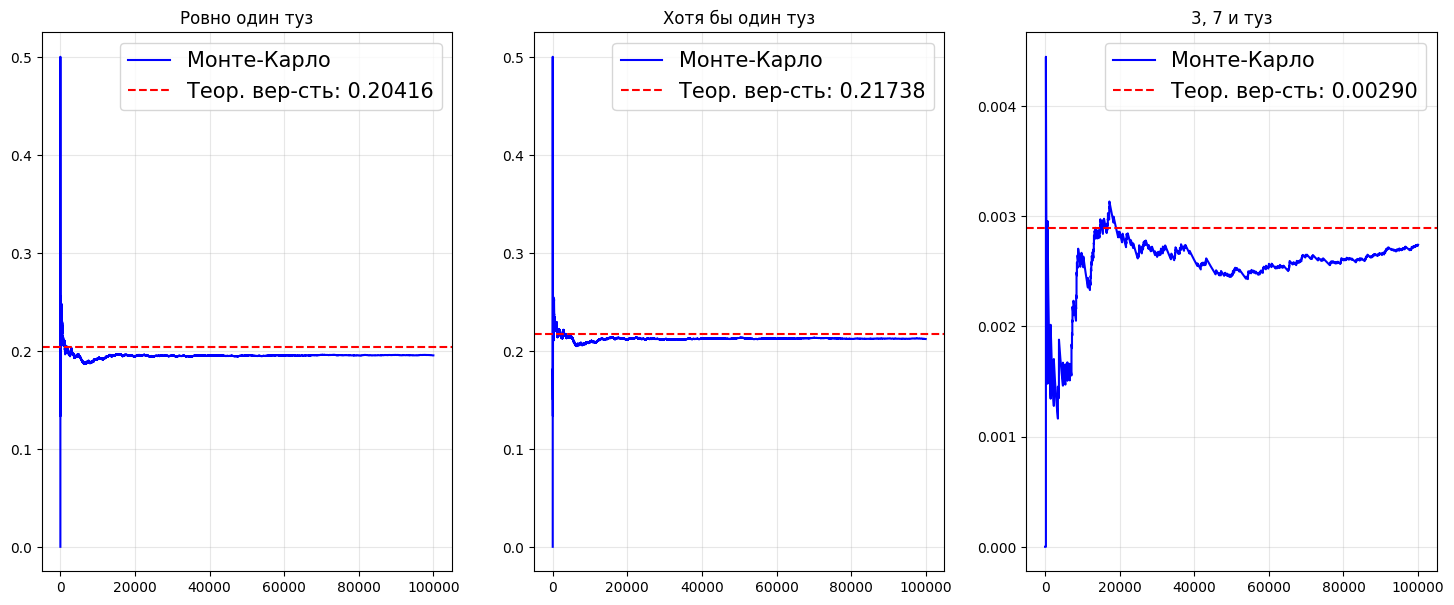

In [137]:
# визуализируем полученные результаты
x = np.linspace(0, mk_n_exp, mk_n_exp)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 7))

ax1.plot(x, mk_p1_results, color = 'b', label = "Монте-Карло")
ax1.axhline(y = t_p1, color = 'r', linestyle = '--', linewidth = 1.5, label = f'Теор. вер-сть: {t_p1:.5f}')

ax1.grid(True, alpha = 0.3)
ax1.set_title(f'Ровно один туз')
ax1.legend(fontsize = 15)

ax2.plot(x, mk_p2_results, color = 'b', label = "Монте-Карло")
ax2.axhline(y = t_p2, color = 'r', linestyle = '--', linewidth = 1.5, label = f'Теор. вер-сть: {t_p2:.5f}')

ax2.grid(True, alpha = 0.3)
ax2.set_title(f'Хотя бы один туз')
ax2.legend(fontsize = 15)

ax3.plot(x, mk_p3_results, color = 'b', label = "Монте-Карло")
ax3.axhline(y = t_p3, color = 'r', linestyle = '--', linewidth = 1.5, label = f'Теор. вер-сть: {t_p3:.5f}')

ax3.grid(True, alpha = 0.3)
ax3.set_title(f'3, 7 и туз')
ax3.legend(fontsize = 15)

plt.show()

# Задача 2

**2.25** Найти вероятность получить 12 очков хотя бы один раз при n бросаниях двух игральных костей.

**Решение:**

$$
    P(\text{12 очков хотя бы один раз при n бросаниях}) = 1 - P(\text{ни разу не получить 12 при n бросаниях})
$$
$$
    P(\text{ни разу не получить 12 при n бросаниях}) = (\frac{35}{36}) ^ n
$$
$$
    P(\text{12 очков хотя бы один раз при n бросаниях}) = 1 - (\frac{35}{36}) ^ n
$$

При $n = 10$:
$$
    P(\text{12 очков хотя бы один раз при 10 бросаниях}) = 1 - (\frac{35}{36}) ^ {10} \approx 0.24551
$$

## Метод Монте-Карло

In [132]:
# задаем зерно датчика
random.seed(a = 42, version = 2)

# число экспериментов
n_exp = 10000
# число подбрасываний
n_throw = 100

# вероятность
mk_p = 0
mk_p_results = []

for exp in range(n_exp):

    found_12 = False
    for throw in range(n_throw):
        
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)

        if die1 + die2 == 12:
            found_12 = True
            break
    
    if found_12:
        mk_p += 1
        
    mk_p_results.append(mk_p / (exp + 1))

mk_p /= n_exp

print(f'12 очков хотя бы один раз при {n_throw} бросаниях: {mk_p:.5f}')

12 очков хотя бы один раз при 100 бросаниях: 0.94140


# Точный метод

In [129]:
t_p = 1 - (35 / 36) ** n_throw

print(f'12 очков хотя бы один раз при {n_throw} бросаниях: {t_p:.5f}')

12 очков хотя бы один раз при 100 бросаниях: 0.94022


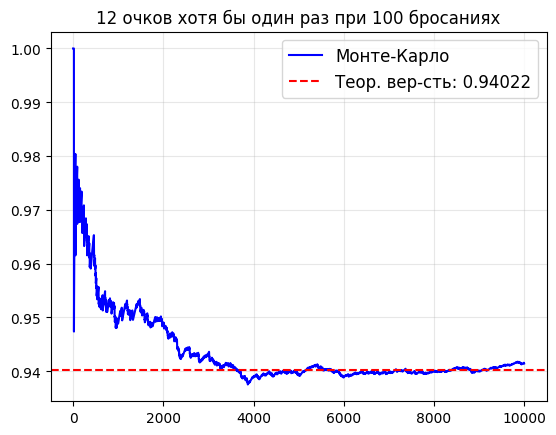

In [135]:
# визуализируем полученные результаты
x = np.linspace(0, n_exp, n_exp)

plt.plot(x, mk_p_results, color = 'b', label = "Монте-Карло")
plt.axhline(y = t_p, color = 'r', linestyle = '--', linewidth = 1.5, label = f'Теор. вер-сть: {t_p:.5f}')

plt.grid(True, alpha = 0.3)
plt.title(f'12 очков хотя бы один раз при {n_throw} бросаниях')
plt.legend(fontsize = 12)

plt.show()